#Análise exploratória dos acidentes rodoviários do Brasil nos anos de 2023 e 2024
##Neste notebook vou usar os dados extraidos no Kaggle e realizar todas as análises feitas:

1. visão geral dos dados (shape, head, tail, sample, dtypes)
2. resumo estatístico: describe
3. gráficos para variáveis quantitativas: histogramas, boxplots
4. gráficos para variáveis qualitativas: gráficos de colunas, de barras, linhas, * pizza
5. agrupamento dos dados: groupby

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt

In [83]:
path = '/content/drive/MyDrive/Colab Notebooks/2025/analise_exploratoria_acidentes_rodovia/'

In [84]:
df = pd.read_csv(path + 'input/datatran.csv')
df.columns

<ipython-input-84-c0ff359c8323>:1: DtypeWarning: Columns (25,26) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + 'input/datatran.csv')


Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop'],
      dtype='object')

In [85]:
#Consultar números de linhas e colunas
df.shape

(140922, 30)

Visão geral dos dados (shape, head, tail, sample, dtypes)

In [86]:
#Primeiras 5 linhas
df.head()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
0,496519.0,2023-01-01,domingo,02:00:00,ES,101,114,SOORETAMA,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,"-19,09484877","-40,05095848",SPRF-ES,DEL04-ES,UOP01-DEL04-ES
1,496543.0,2023-01-01,domingo,03:40:00,SP,116,"113,1",TAUBATE,Entrada inopinada do pedestre,Atropelamento de Pedestre,...,0,0,4,0,2,"-23,0445658","-45,58259814",SPRF-SP,DEL02-SP,UOP02-DEL02-SP
2,496590.0,2023-01-01,domingo,01:40:00,MT,163,1112,GUARANTA DO NORTE,Reação tardia ou ineficiente do condutor,Tombamento,...,1,0,2,1,3,"-9,70020602","-54,87588757",SPRF-MT,DEL06-MT,UOP03-DEL06-MT
3,496610.0,2023-01-01,domingo,10:40:00,PR,376,"314,8",ORTIGUEIRA,Velocidade Incompatível,Tombamento,...,0,1,2,0,3,"-23,985512","-51,083555",SPRF-PR,DEL07-PR,UOP02-DEL07-PR
4,496659.0,2023-01-01,domingo,14:55:00,MG,116,"569,4",MANHUACU,Acumulo de água sobre o pavimento,Colisão frontal,...,2,1,1,2,3,"-20,10007457","-42,17884091",SPRF-MG,DEL06-MG,UOP03-DEL06-MG


In [87]:
#Últimas 5 Linhas
df.tail()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
140917,661295.0,2024-12-21,sábado,07:00:00,PB,230,"135,2",CAMPINA GRANDE,Ausência de reação do condutor,Saída de leito carroçável,...,0,0,0,1,1,-7.282103,-35.768394,SPRF-PB,DEL02-PB,UOP01-DEL02-PB
140918,661307.0,2024-12-01,domingo,06:30:00,RJ,393,298,VOLTA REDONDA,Ausência de reação do condutor,Colisão frontal,...,0,0,0,2,2,-22.543133,-44.112986,SPRF-RJ,DEL07-RJ,UOP02-DEL07-RJ
140919,661377.0,2024-07-09,terça-feira,16:20:00,ES,101,"101,5",SOORETAMA,Desrespeitar a preferência no cruzamento,Colisão transversal,...,0,0,0,3,2,-18.988339,-39.999335,SPRF-ES,DEL04-ES,UOP02-DEL04-ES
140920,661576.0,2024-12-17,terça-feira,21:35:00,RJ,101,391,RIO DE JANEIRO,Frear bruscamente,Colisão traseira,...,0,1,0,1,2,-22.894827,-43.68492,SPRF-RJ,DEL03-RJ,UOP01-DEL03-RJ
140921,661598.0,2024-12-27,sexta-feira,13:00:00,ES,101,67,SAO MATEUS,Conversão proibida,Colisão transversal,...,2,0,1,3,3,-18.72054,-39.865893,SPRF-ES,DEL04-ES,UOP02-DEL04-ES


In [88]:
#Pega qualquer linhas de exemplo
df.sample()

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,feridos_graves,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop
38317,527917.0,2023-06-07,quarta-feira,06:00:00,MG,364,10,FRUTAL,Ausência de sinalização,Colisão frontal,...,0,1,0,1,2,"-20,025185","-48,94096",SPRF-MG,DEL13-MG,UOP02-DEL13-MG


In [89]:
#dtypes mostra o tipo dos valores da coluna
df.dtypes

,0
id,float64
data_inversa,object
dia_semana,object
horario,object
uf,object
br,int64
km,object
municipio,object
causa_acidente,object
tipo_acidente,object


Resumo estatístico: describe

In [90]:
# método que traz o resumo estatístico das colunas numéricas

df.describe()

,id,br,pessoas,mortos,feridos_leves,feridos_graves,ilesos,ignorados,feridos,veiculos
count,140922.000000,140922.000000,140922.000000,140922.000000,140922.000000,140922.000000,140922.000000,140922.000000,140922.000000,140922.000000
mean,575560.327813,209.426520,2.605789,0.083642,0.877698,0.278892,1.055492,0.398440,1.156590,1.991584
std,45075.436594,129.243035,2.260555,0.353453,1.115905,0.626801,1.777051,0.857437,1.241434,1.149673
min,496506.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,536625.250000,101.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,575610.500000,158.000000,2.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,2.000000
75%,614739.750000,324.000000,3.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,661607.000000,498.000000,95.000000,37.000000,83.000000,35.000000,78.000000,88.000000,84.000000,131.000000


In [91]:
#Verificação de dados faltantes e tipos

df.isnull().sum()

,0
id,0
data_inversa,0
dia_semana,0
horario,0
uf,0
br,0
km,0
municipio,0
causa_acidente,0
tipo_acidente,0


In [92]:
# Substituir 3 valores faltantes por "Não informado"

df.loc[df['classificacao_acidente'].isnull(), 'classificacao_acidente'] = 'Não informado'


In [93]:
df['data'] = pd.to_datetime(df['data_inversa']).dt.strftime('%d/%m/%Y')
df['ano'] = pd.to_datetime(df['data_inversa']).dt.strftime('%Y')

In [94]:
# Exclusão de colunas que não fazem sentido para a analise proposta:  'data_inversa','sentido_via','uso_solo', 'regional', 'delegacia', 'uop'
df = df.drop(['data_inversa','sentido_via','uso_solo','regional', 'delegacia', 'uop'], axis=1)

In [95]:
#Criando uma lista para verificar algumas colunas

#lista_colunas = ['causa_acidente', 'tipo_acidente',
#      'classificacao_acidente', 'fase_dia', 'condicao_metereologica',]

In [96]:
#verificar todas os valores únicos das colunas

#for coluna in lista_colunas:
  #print(coluna)
  #print(df[coluna].unique())

In [97]:
#Encontrar a BR com mais acidentes
br_mais_acidentes = df['br'].value_counts().idxmax()
num_acidentes_br_mais_acidentes = df['br'].value_counts().max()

print(f"A BR com mais acidentes é: {br_mais_acidentes}")
print(f"Número de acidentes nesta BR: {num_acidentes_br_mais_acidentes}")

# Encontrar o estado da BR com mais acidentes
estado_br_mais_acidentes = df[df['br'] == br_mais_acidentes]['uf'].unique().tolist()

print(f"Estados por onde a BR {br_mais_acidentes} passa: {estado_br_mais_acidentes}")


A BR com mais acidentes é: 101
Número de acidentes nesta BR: 24412
Estados por onde a BR 101 passa: ['ES', 'SC', 'PE', 'RJ', 'SE', 'BA', 'PB', 'RN', 'RS', 'AL', 'SP']


In [98]:
# Filtrar os dados para a BR 101
df_br101 = df[df['br'] == 101]

# Contar a frequência de acidentes por estado na BR 101
acidentes_por_estado_br101 = df_br101['uf'].value_counts()

# Encontrar o estado com mais acidentes na BR 101
estado_mais_acidentes_br101 = acidentes_por_estado_br101.idxmax()
num_acidentes_estado_mais_br101 = acidentes_por_estado_br101.max()

print(f"Na BR 101, o estado que mais teve acidentes foi: {estado_mais_acidentes_br101}")
print(f"Número de acidentes neste estado na BR 101: {num_acidentes_estado_mais_br101}")

print("\nContagem de acidentes por estado na BR 101:")
acidentes_por_estado_br101


Na BR 101, o estado que mais teve acidentes foi: SC
Número de acidentes neste estado na BR 101: 8492

Contagem de acidentes por estado na BR 101:


,count
uf,
SC,8492
RJ,4314
ES,3550
PE,2368
BA,1742
RN,1219
PB,848
SE,629
AL,515


In [99]:
# Somar os tipos de vítimas por estado na BR 101
df_br101_total_vitimas_estado = df_br101.groupby('uf')[['mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados']].sum()

print("\nTotal de vítimas por tipo e estado na BR 101:")
# Exibir o resultado
print(df_br101_total_vitimas_estado)

# Opcional: Exibir o total de vítimas por estado (somando todos os tipos de vítimas)
df_br101_total_vitimas_por_estado_geral = df_br101_total_vitimas_estado[['mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados']].sum(axis=1).reset_index(name='total_vitimas')
df_br101_total_vitimas_por_estado_geral = df_br101_total_vitimas_por_estado_geral.sort_values(by='total_vitimas', ascending=False)

print("\nTotal geral de vítimas por estado na BR 101:")
df_br101_total_vitimas_por_estado_geral



Total de vítimas por tipo e estado na BR 101:
    mortos  feridos_leves  feridos_graves  ilesos  ignorados
uf                                                          
AL      49            368             127     458        272
BA     316           1629             647    1809        709
ES     232           3172            1125    3216       1280
PB      43            665             227     798        261
PE     127           1946             725    2241        788
RJ     259           4292             889    4580        708
RN      48           1053             309    1323        197
RS      21            262              52     266         96
SC     241           7269            1806    8707       2314
SE      51            492             185     581        287
SP       8            432              94     494         76

Total geral de vítimas por estado na BR 101:


,uf,total_vitimas
8,SC,20337
5,RJ,10728
2,ES,9025
4,PE,5827
1,BA,5110
6,RN,2930
3,PB,1994
9,SE,1596
0,AL,1274
10,SP,1104


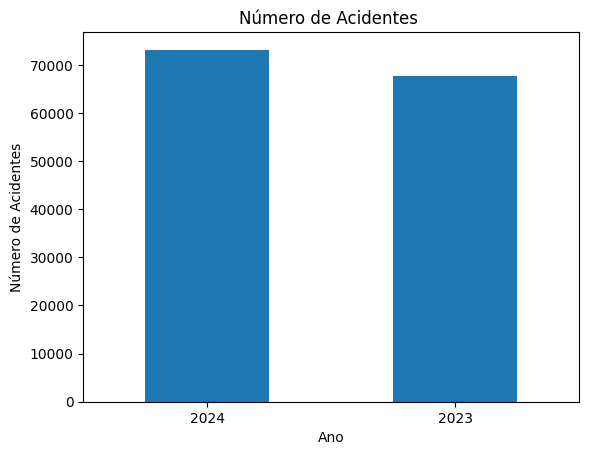

In [100]:
# Analisando o número de acidentes nos últimos anos
df['ano'] = pd.to_numeric(df['ano'], errors='coerce')
df['ano'].value_counts().plot(kind = 'bar')
plt.title('Número de Acidentes ')
plt.xlabel('Ano')
plt.ylabel('Número de Acidentes')
plt.xticks(rotation=0)
plt.show()

In [101]:
df.columns

Index(['id', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio',
       'causa_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'pessoas',
       'mortos', 'feridos_leves', 'feridos_graves', 'ilesos', 'ignorados',
       'feridos', 'veiculos', 'latitude', 'longitude', 'data', 'ano'],
      dtype='object')

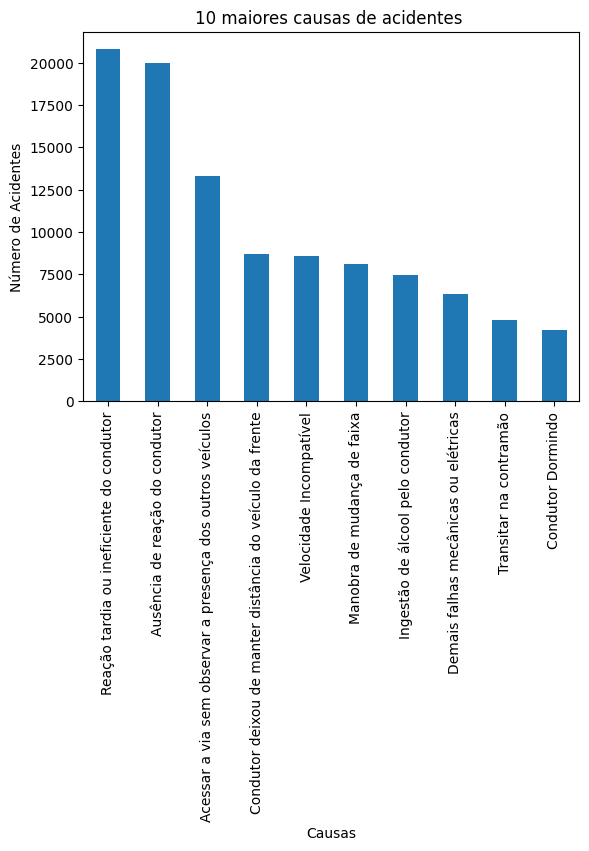

In [102]:
# Analisando as maiores causas de acidentes
df['causa_acidente'].value_counts().head(10).plot(kind = 'bar')
plt.title('10 maiores causas de acidentes ')
plt.xlabel('Causas')
plt.ylabel('Número de Acidentes')
plt.show()


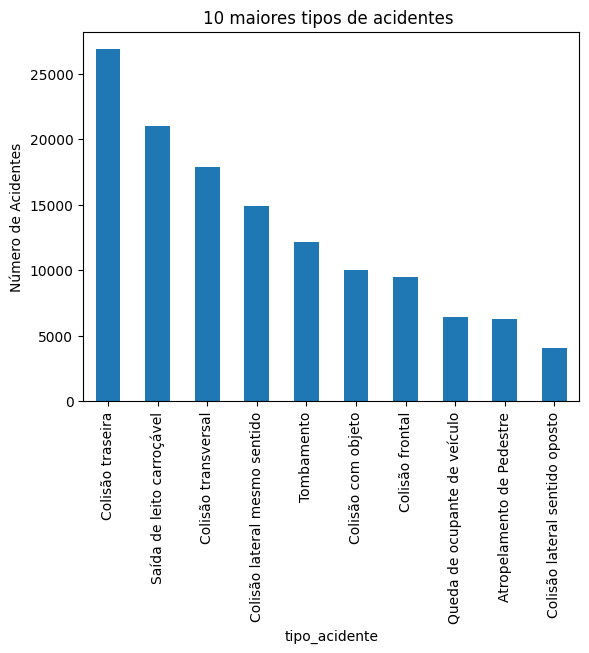

In [103]:
# Analisando os tipos de de acidentes
df['tipo_acidente'].value_counts().head(10).plot(kind = 'bar')
plt.title('10 maiores tipos de acidentes ')
plt.ylabel('Número de Acidentes')
plt.show()


##Conclusão da primeira analise:
* Conseguimos observar que a número de acidentes aumentou um pouco do ano de 2023 para 2024, mas dentro da normalidade;
* Comprovamos que a BR 101 foi a rodovia com maior numeros de acidentes, mas concluimos também que ela é uma das rodovias mais extensas, que pode justificar seu grande número de acidentes;
* Analisamos e mostramos as 10 maiores causas de acidentes rodoviarios;
* Analisamos e mostramos os 10 maiores tipos de acidentes e constatamos que a "Colisão traseira" é muito expressiva.

###Melhoria
Criação de dashboard interativo utilizando Streamlit, para que o usuário possa realizar filtros de seu Estado e rodovia.

Análise feita por André Rodrigues 09/06/2025